# Scatter plot with different Regression lines

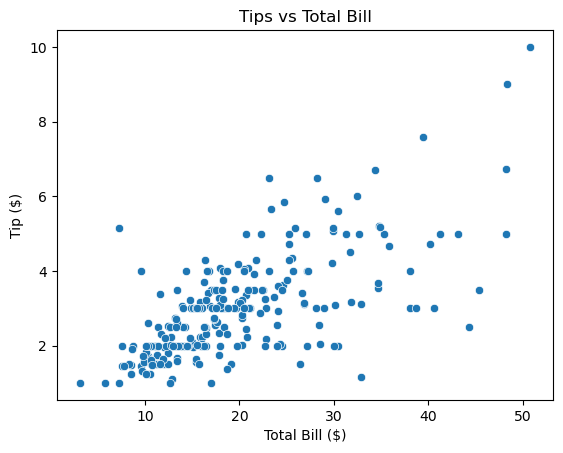

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load a sample dataset (for demonstration purposes)
tips = sns.load_dataset("tips")

# Create a scatter plot using Seaborn
sns.scatterplot(x="total_bill", y="tip", data=tips)

# Add title and labels
plt.title("Tips vs Total Bill")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")

# Show the plot
plt.show()

## Linear Regression

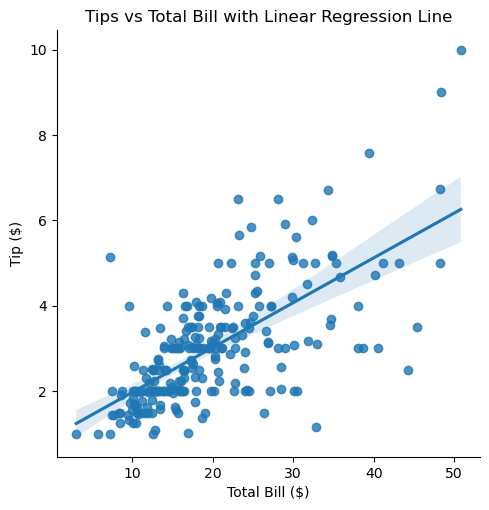

In [22]:
# Load a sample dataset (for demonstration purposes)
tips = sns.load_dataset("tips")

# Create a scatter plot with linear regression line using Seaborn
sns.lmplot(x="total_bill", y="tip", data=tips)

# Add title and labels
plt.title("Tips vs Total Bill with Linear Regression Line")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")

# Show the plot
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming 'X' contains the features and 'y_true' contains the actual target values
# You need to replace 'X' and 'y_true' with your actual data
X = tips[['total_bill']]  # Example feature
y_true = tips['tip']      # Example target variable

# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X, y_true)

# Generate predicted values
y_pred = linear_model.predict(X)

# Compute mean squared error
mse = mean_squared_error(y_true, y_pred)

# Compute root mean squared error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 1.0178504025697377


## Polinomial Regression to the 3rd degree

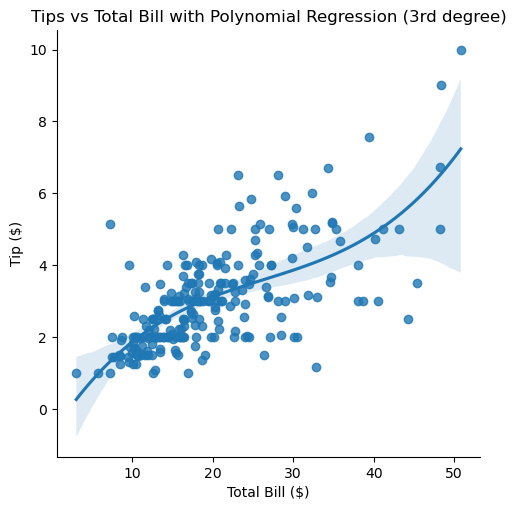

In [19]:
# Load a sample dataset (for demonstration purposes)
tips = sns.load_dataset("tips")

# Create a scatter plot with polynomial regression line using Seaborn
sns.lmplot(x="total_bill", y="tip", data=tips, order=3)

# Add title and labels
plt.title("Tips vs Total Bill with Polynomial Regression (3rd degree)")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")

# Show the plot
plt.show()

In [20]:
from sklearn.metrics import r2_score

# Fit a polynomial regression model
coefficients = np.polyfit(tips["total_bill"], tips["tip"], deg=3)
poly_model = np.poly1d(coefficients)

# Make predictions using the polynomial regression model
predictions = poly_model(tips["total_bill"])

# Compute R-squared
r_squared = r2_score(tips["tip"], predictions)
print("R-squared:", r_squared)

R-squared: 0.4728729406559252


## Logistical Regression

Optimization terminated successfully.
         Current function value: 0.519708
         Iterations 6


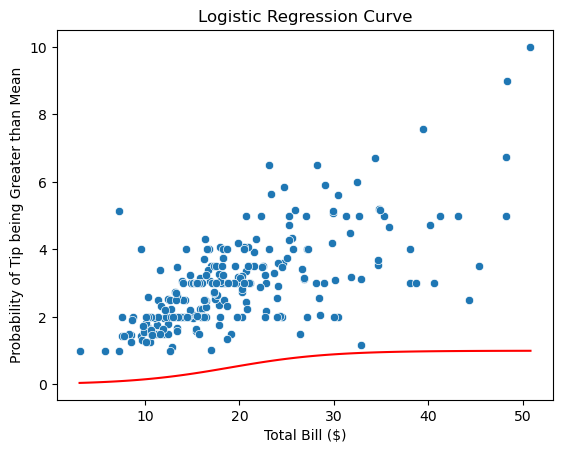

In [17]:
import numpy as np
import statsmodels.api as sm

# Load a sample dataset (for demonstration purposes)
tips = sns.load_dataset("tips")

# Create a scatter plot using Seaborn
sns.scatterplot(x="total_bill", y="tip", data=tips)

# Fit a logistic regression model
X = tips["total_bill"]
y = tips["tip"]
X = sm.add_constant(X)  # Add a constant term to the predictor
logit_model = sm.Logit((y > y.mean()).astype(int), X)  # Fit logistic regression
logit_result = logit_model.fit()

# Create a line plot of the logistic regression curve
x_values = np.linspace(X["total_bill"].min(), X["total_bill"].max(), 100)
y_prob = logit_result.predict(sm.add_constant(x_values))
plt.plot(x_values, y_prob, color='red')

# Add title and labels
plt.title("Logistic Regression Curve")
plt.xlabel("Total Bill ($)")
plt.ylabel("Probability of Tip being Greater than Mean")

# Show the plot
plt.show()

In [18]:
predictions = (logit_result.predict(X) > 0.5).astype(int)

# Compute accuracy
accuracy = (predictions == (y > y.mean()).astype(int)).mean()
print("Accuracy:", accuracy)

Accuracy: 0.7418032786885246


## Heatmap

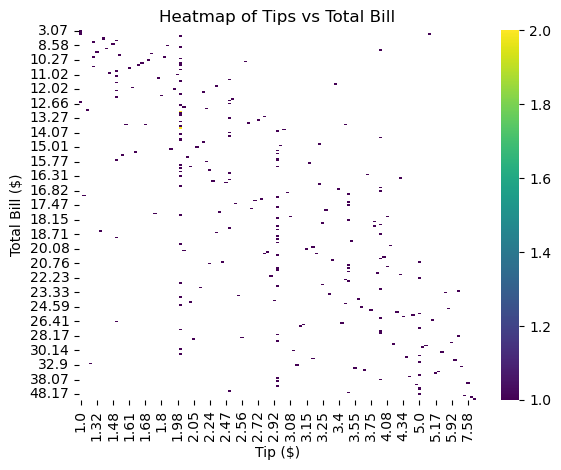

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load a sample dataset (for demonstration purposes)
tips = sns.load_dataset("tips")

# Create a heatmap using Seaborn
sns.heatmap(tips.pivot_table(index='total_bill', columns='tip', aggfunc='size'), cmap='viridis')

# Add title and labels
plt.title("Heatmap of Tips vs Total Bill")
plt.xlabel("Tip ($)")
plt.ylabel("Total Bill ($)")

# Show the plot
plt.show()

## Histogram 2D

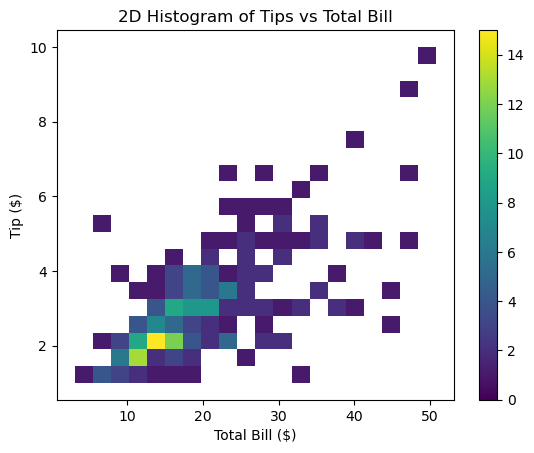

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load a sample dataset (for demonstration purposes)
tips = sns.load_dataset("tips")

# Create a 2D histogram using Seaborn
sns.histplot(x="total_bill", y="tip", data=tips, bins=20, cmap='viridis', cbar=True)

# Add title and labels
plt.title("2D Histogram of Tips vs Total Bill")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")

# Show the plot
plt.show()

## Histogram 3D

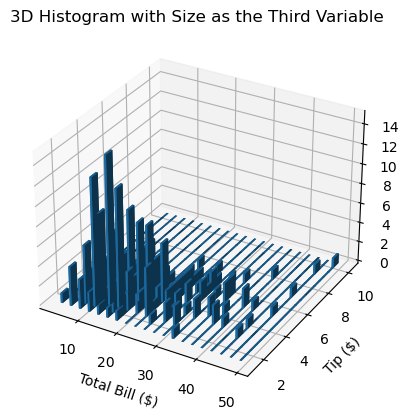

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Load a sample dataset (for demonstration purposes)
tips = sns.load_dataset("tips")

# Extract data for demonstration
x = tips['total_bill']
y = tips['tip']
z = tips['size']  # Third variable representing size of the group

# Create a 3D histogram
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create histogram
hist, xedges, yedges = np.histogram2d(x, y, bins=20)
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

# Create 3D bars
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

# Set labels and title
ax.set_xlabel('Total Bill ($)')
ax.set_ylabel('Tip ($)')
ax.set_zlabel('Frequency')
ax.set_title('3D Histogram with Size as the Third Variable')

# Show plot
plt.show()## Histogram 2D